In [1]:
import numpy as np
import pandas as pd

In [206]:
SEED = 0
NUM_ANTS = int(1e3)
MAX_STEPS = 100

In [3]:
np.random.seed(SEED)

In [195]:
def constraints(x, y):
    if -2<x<2 and -2<y<2:
        return True
    return False

In [197]:
class Ants():
    def __init__(self, n:int) -> None:
        if n<=0:
            raise ValueError("Error: 'n' must be a positive integer")
        self.num_initial = n
        self.num_alive = n
        self.perc_alive = 1.0
        self.step = 0
        self.death_history = {0: 0}
        self.positions = self.initial_positions()
        self.possible_moves =  np.array([[1,0], [-1,0], [0,1], [0,-1]])

    def initial_positions(self):
        
        positions = pd.DataFrame(columns = ['x', 'y'])
        positions['x'] = np.zeros(self.num_initial)
        positions['y'] = np.zeros(self.num_initial)
        
        return positions

    def move(self):
        self.step +=1
        moves = self.possible_moves[np.random.choice(4, self.num_alive)]
        self.positions += moves
        alive = self.positions.apply(lambda pos: constraints(pos['x'], pos['y']), axis=1)
        self.death_history[self.step] = (~alive).astype(int).sum()
        self.num_alive -= self.death_history[self.step]
        self.perc_alive = self.num_alive/self.num_initial
        self.positions = self.positions[alive]
        return self.death_history[self.step]
    
    def summarize_positions(self):
        return self.positions.reset_index().groupby(['x', 'y']).count().rename({'index': 'count'}, axis=1)



In [199]:
class Grid():
    def __init__(self, height:int, width:int, default_value=0, changes = None, constraints=None) -> None:
        
        assert height>0
        assert width>0
        self.height = height
        self.width = width
        self.index = np.arange(self.height) - self.height//2
        self.columns = np.arange(self.width) - self.width//2
        self.default_value = default_value
        
        self.default_grid = None
        self.initialize_grid()
        self.grid = self.default_grid
        self.update_grid(changes)
        self.mask = None
        self.mask = self.initialize_mask(constraints)


    def initialize_grid(self):
        grid = np.full([self.height, self.width], self.default_value)
        grid = pd.DataFrame(data=grid, index=self.index, columns=self.columns)
        self.default_grid = grid
        return grid

    def update_grid(self, changes, from_default=True):
        if changes!=None:
            # if from_default=True it starts the changes form the default grid, otherise fromt the actual one
            if from_default:
                self.grid = self.default_grid.copy()
            # update the grid
            for x,y in changes.index:
                # the grid could be smaller than the indeces in 'changes'
                try:
                    self.grid.at[x,y] = changes.loc[(x,y)].values[0]
                except:
                    pass
        return None

    def initialize_mask(self, constraints):
        if constraints!=None:
            # create every possible combination between 2 arrays
            combinations = np.array(np.meshgrid(self.index, self.columns)).T.reshape(-1, 2)
            combinations = pd.DataFrame(data=combinations, columns=['y', 'x'])
            # evaluate the constraint function in each point
            combinations['mask'] = combinations.apply(lambda pos: not constraints(pos['x'], pos['y']), axis=1)
            mask = combinations.set_index(['x', 'y'])
            mask = mask.unstack(level=0)
            mask = mask.droplevel(level=0, axis=1)
            self.mask = mask
            return mask
        return None
    
    def plot(self, vmax=None):
        return sns.heatmap(
            data = self.grid, 
            vmin = 0, 
            vmax = vmax, 
            cmap = 'rocket_r', 
            annot = False, 
            linewidths = 0.5, 
            mask = self.mask
            )
        

In [207]:
def tracking(num_ants, max_steps=1, grid_height=10, grid_width=10):
    
    ants = Ants(num_ants)
    grid = Grid(grid_height, grid_width)
    start_change = pd.DataFrame([[NUM_ANTS]], index=['y'], columns=['x'])
    grid.update_grid(changes=start_change)

    print(f'step:\tdeath\talive\tperc_alive')

    while ants.step<=max_steps and ants.num_alive>0:
        ants.move()
        grid.update_grid(changes=ants.summarize_positions())
        grid.plot()
        if ants.step%5==0 or ants.step>max_steps or ants.num_alive<=0:
            print(f'{ants.step}:\t{ants.death_history[ants.step]}\t{ants.num_alive}\t{ants.perc_alive}')

    death_history = pd.DataFrame.from_dict(ants.death_history, orient='index', columns=['num'])
    death_history.index.name = 'step'
    death_history.sort_index(inplace=True)


    return death_history

In [209]:
# print('Ants creation...')
# ants = Ants(NUM_ANTS)
print('Movements tracking...')
death_history = tracking(num_ants=NUM_ANTS, max_steps=MAX_STEPS, grid_height=5, grid_width=5)

Movements tracking...


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='step'>

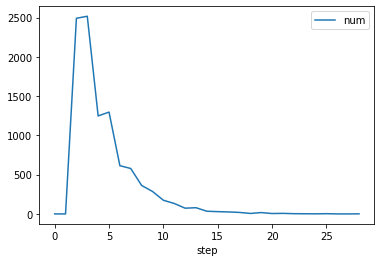

In [48]:
death_history.plot()

In [83]:
ants = Ants(NUM_ANTS)
ants.move()
ants.move()
ants.move()

,x,y
0,0.0,1.0
4,0.0,-1.0
6,0.0,1.0
7,-1.0,0.0
8,1.0,0.0
...,...,...
99992,0.0,-1.0
99993,-1.0,0.0
99995,-1.0,0.0
99998,0.0,1.0


In [101]:
ants.move()
ants.summarize_positions()

count
x    y          
-1.0 -1.0     24
      1.0     30
 0.0  0.0     46
 1.0 -1.0     31
      1.0     26

In [102]:
# class Grid()
height = 5
width = 9
default_value = 0

In [ ]:
vmin=None, vmax=None, cmap=None
uniform_data = 
ax = sns.heatmap(uniform_data)

In [103]:
index = np.arange(height) - height//2
columns = np.arange(width) - width//2
grid = np.full([height, width], default_value)
grid = pd.DataFrame(data=grid, index=index, columns=columns)
# changes = ...
# for 

# data

In [104]:
grid

,-4,-3,-2,-1,0,1,2,3,4
-2,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0


In [112]:
a = ants.summarize_positions()
for x,y in a.index:
    grid.at[x,y] = a.loc[(x,y), 'count']

<AxesSubplot:>

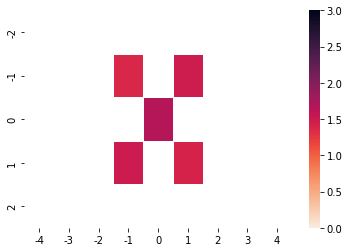

In [129]:
import seaborn as sns
sns.heatmap(np.log10(grid), vmin=0, vmax=np.log10(1000), cmap='rocket_r', annot=False, linewidths=0.5)

In [159]:
pd.DataFrame(data=combinations, columns=['x', 'y'])

,x,y
0,-2,-4
1,-2,-3
2,-2,-2
3,-2,-1
4,-2,0
5,-2,1
6,-2,2
7,-2,3
8,-2,4
9,-1,-4


In [165]:
combinations = np.array(np.meshgrid(index, columns)).T.reshape(-1, 2)
mask = pd.DataFrame(data=combinations, columns=['y', 'x'])
mask['mask'] = mask.apply(lambda pos: not constraints(pos['x'], pos['y']), axis=1)
mask = mask.set_index(['x', 'y'])
mask = mask.unstack(level=0)
mask = mask.droplevel(level=0, axis=1)
mask

x,-4,-3,-2,-1,0,1,2,3,4
y,,,,,,,,,
-2,True,True,True,True,True,True,True,True,True
-1,True,True,True,False,False,False,True,True,True
0,True,True,True,False,False,False,True,True,True
1,True,True,True,False,False,False,True,True,True
2,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

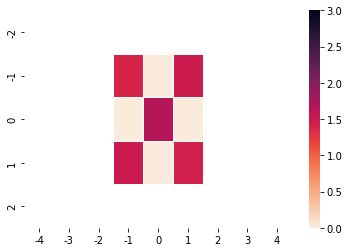

In [166]:
sns.heatmap(np.log10(grid+1), vmin=0, vmax=np.log10(1000), cmap='rocket_r', annot=False, linewidths=0.5, mask=mask)
# grid.shape
# mask.shape

In [191]:
class Grid():
    def __init__(self, height:int, width:int, default_value=0, changes = None, constraints=None) -> None:
        
        assert height>0
        assert width>0
        self.height = height
        self.width = width
        self.index = np.arange(self.height) - self.height//2
        self.columns = np.arange(self.width) - self.width//2
        self.default_value = default_value
        
        self.default_grid = None
        self.initialize_grid()
        self.grid = self.default_grid
        self.update_grid(changes)
        self.mask = None
        self.mask = self.initialize_mask(constraints)


    def initialize_grid(self):
        grid = np.full([self.height, self.width], self.default_value)
        grid = pd.DataFrame(data=grid, index=self.index, columns=self.columns)
        self.default_grid = grid
        return grid

    def update_grid(self, changes, from_default=True):
        if changes!=None:
            # if from_default=True it starts the changes form the default grid, otherise fromt the actual one
            if from_default:
                self.grid = self.default_grid.copy()
            # update the grid
            for x,y in changes.index:
                self.grid.at[x,y] = changes.loc[(x,y)].values[0]
        return None

    def initialize_mask(self, constraints):
        if constraints!=None:
            # create every possible combination between 2 arrays
            combinations = np.array(np.meshgrid(self.index, self.columns)).T.reshape(-1, 2)
            combinations = pd.DataFrame(data=combinations, columns=['y', 'x'])
            # evaluate the constraint function in each point
            combinations['mask'] = combinations.apply(lambda pos: not constraints(pos['x'], pos['y']), axis=1)
            mask = combinations.set_index(['x', 'y'])
            mask = mask.unstack(level=0)
            mask = mask.droplevel(level=0, axis=1)
            self.mask = mask
            return mask
        return None
    
    def plot(self, vmax=None):
        return sns.heatmap(
            data = self.grid, 
            vmin = 0, 
            vmax = vmax, 
            cmap = 'rocket_r', 
            annot = False, 
            linewidths = 0.5, 
            mask = self.mask
            )
        


In [192]:
grid = Grid(5, 9)

<AxesSubplot:>

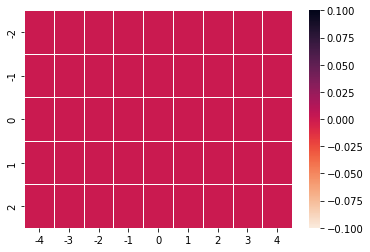

In [194]:
grid.plot()